In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_train.csv
/kaggle/input/loan-data-set/loan_test.csv


In [2]:
df = pd.read_csv('/kaggle/input/loan-data-set/loan_train.csv')

In [3]:
df.head(15)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,541700,419600.0,26700000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,233300,151600.0,9500000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,303600,250400.0,15800000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,400600,152600.0,16800000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,1284100,1096800.0,34900000,360.0,1.0,Semiurban,N


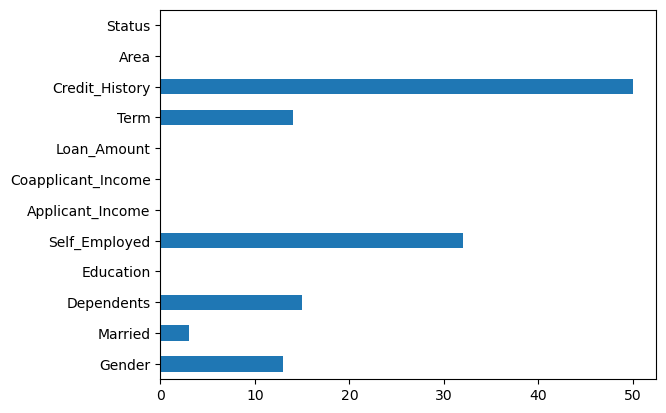

In [4]:
df.isnull().sum().plot.barh();

In [5]:
df = df.dropna()
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 50.7+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Applicant_Income,499.0,5.336128e+05,5.618157e+05,15000.0,288550.0,385900.0,582500.0,8100000.0
Coapplicant_Income,499.0,1.566996e+05,2.580955e+05,0.0,0.0,108600.0,225150.0,3383700.0
Loan_Amount,499.0,1.395251e+07,8.345237e+06,0.0,9800000.0,12600000.0,16650000.0,60000000.0
Term,499.0,3.420120e+02,6.486037e+01,36.0,360.0,360.0,360.0,480.0
Credit_History,499.0,8.517034e-01,3.557504e-01,0.0,1.0,1.0,1.0,1.0


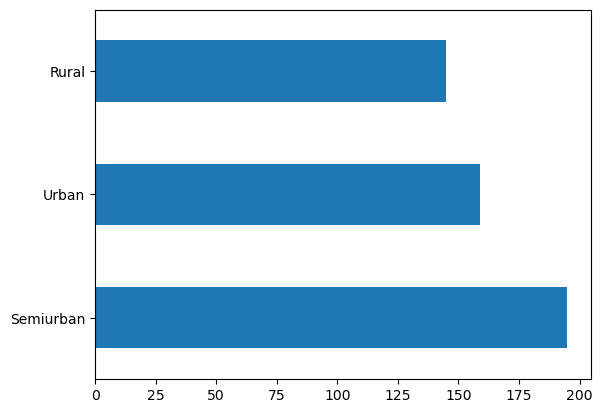

In [8]:
df["Area"].value_counts().plot.barh();

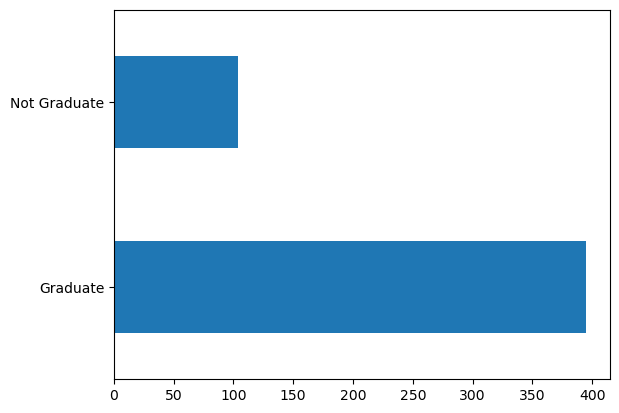

In [9]:
df["Education"].value_counts().plot.barh();

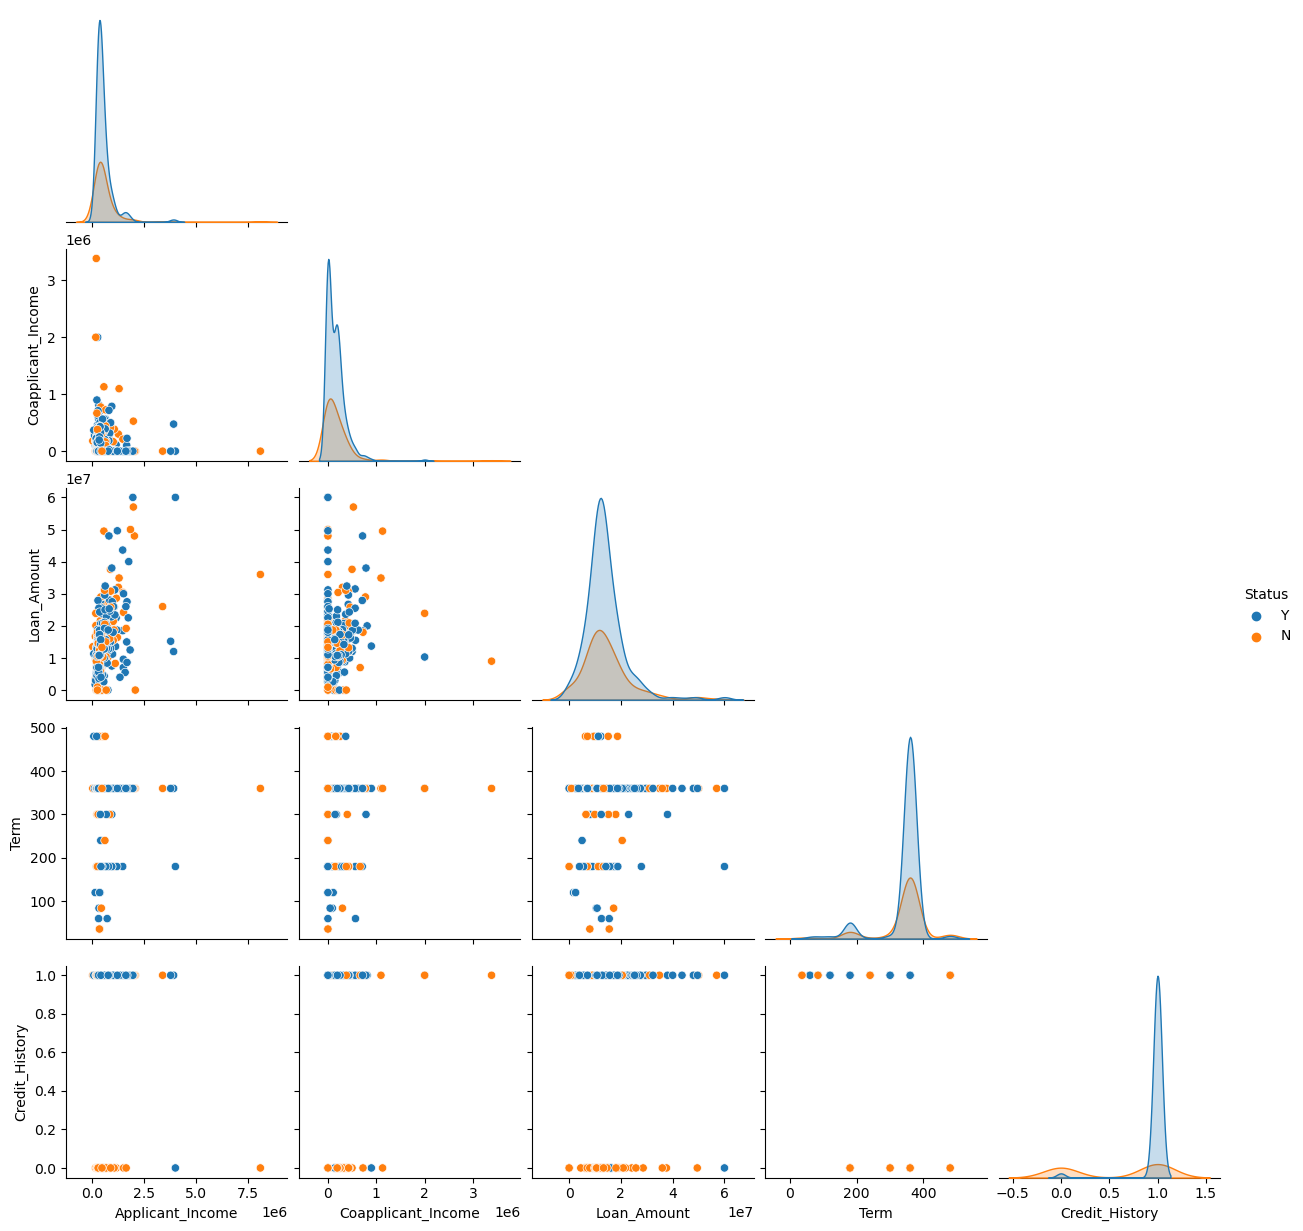

In [10]:
import seaborn as sns
sns.pairplot(df,corner=True,hue="Status")

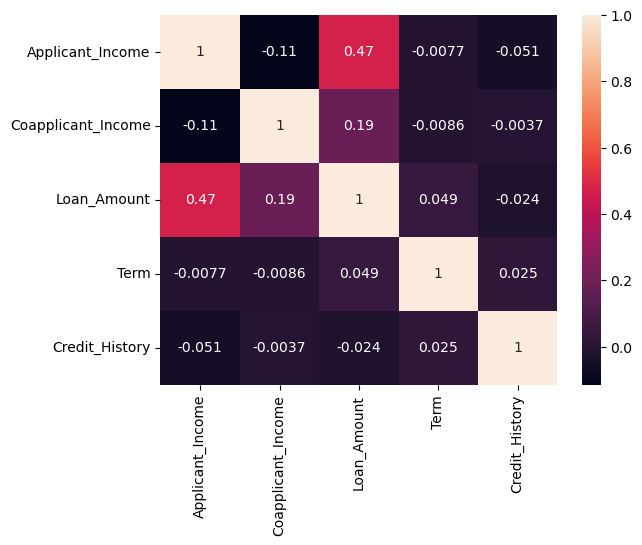

In [11]:
sns.heatmap(df.corr(),annot=True);

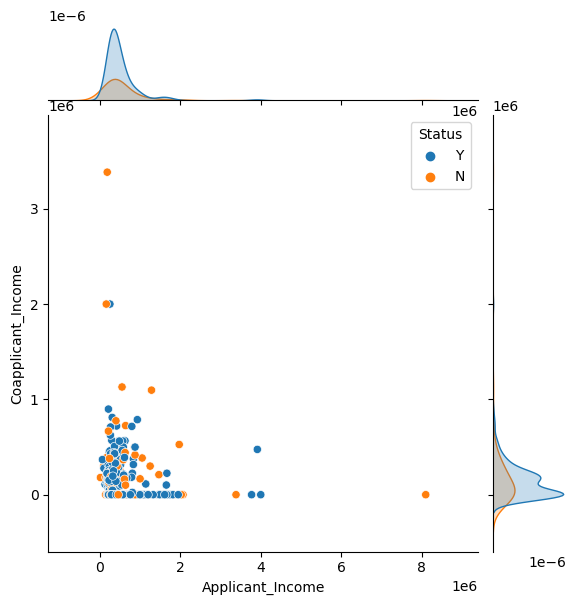

In [12]:
sns.jointplot(df,x="Applicant_Income",y="Coapplicant_Income",hue="Status");

In [13]:
x = df.drop(['Dependents','Gender','Married','Education','Self_Employed','Area','Status'],axis=1)
dms = pd.get_dummies(df[['Dependents','Gender','Married','Education','Self_Employed','Area']])
X = pd.concat([x,dms],axis=1)
Y = df['Status']

In [14]:
X

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Area_Rural,Area_Semiurban,Area_Urban
0,584900,0.0,15000000,360.0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,458300,150800.0,12800000,360.0,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,300000,0.0,6600000,360.0,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,258300,235800.0,12000000,360.0,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,600000,0.0,14100000,360.0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,290000,0.0,7100000,360.0,1.0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0
610,410600,0.0,4000000,180.0,1.0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0
611,807200,24000.0,25300000,360.0,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1
612,758300,0.0,18700000,360.0,1.0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1


In [15]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Status, Length: 499, dtype: object

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.35,random_state=42)
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier().fit(X_train,y_train)
y_pred = gbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.77      0.56      0.65        64
           Y       0.78      0.90      0.84       111

    accuracy                           0.78       175
   macro avg       0.77      0.73      0.74       175
weighted avg       0.78      0.78      0.77       175



In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier().fit(X_train,y_train)
y_pred = pa.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.49      0.77      0.60        64
           Y       0.80      0.55      0.65       111

    accuracy                           0.63       175
   macro avg       0.65      0.66      0.63       175
weighted avg       0.69      0.63      0.63       175



In [20]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier().fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.83      0.62      0.71        64
           Y       0.81      0.93      0.87       111

    accuracy                           0.82       175
   macro avg       0.82      0.78      0.79       175
weighted avg       0.82      0.82      0.81       175



In [21]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(verbose=False).fit(X_train,y_train)
y_pred = cat.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.89      0.62      0.73        64
           Y       0.82      0.95      0.88       111

    accuracy                           0.83       175
   macro avg       0.85      0.79      0.81       175
weighted avg       0.84      0.83      0.83       175

